In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("../datasets/processed/preprocessed_data.csv")
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


In [26]:
# selecting best eps
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

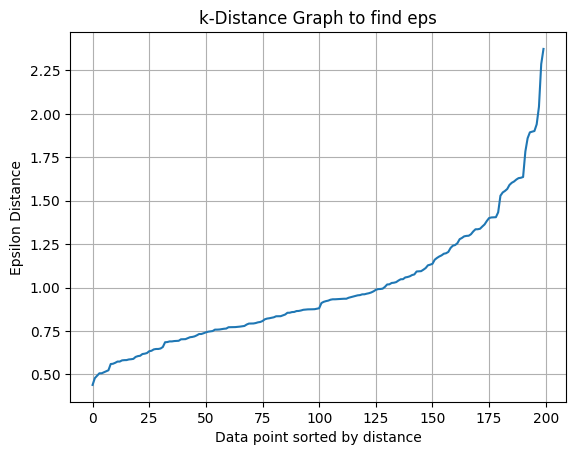

In [27]:
distances = np.sort(distances[:,9],axis=0)
plt.plot(distances)
plt.title("k-Distance Graph to find eps")
plt.ylabel("Epsilon Distance")
plt.xlabel("Data point sorted by distance")
plt.grid(True)
plt.show()

In [38]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(
    eps=1.60,
    min_samples=6,
    metric = 'euclidean'
    )
clusters = dbscan_model.fit_predict(df)

In [39]:
df["cluster_label"] = clusters
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,cluster_label
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152,0
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152,0
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405,1
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405,1
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405,1


In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
plot_df = pd.DataFrame(pca_data, columns = ["PC1","PC2"])
plot_df['Cluster'] = clusters
plot_df.head()

,PC1,PC2,Cluster
0,1.466611,0.758235,0
1,1.330614,1.798012,0
2,-1.393628,-0.564514,1
3,-1.626101,1.212308,1
4,-1.437875,-0.189996,1


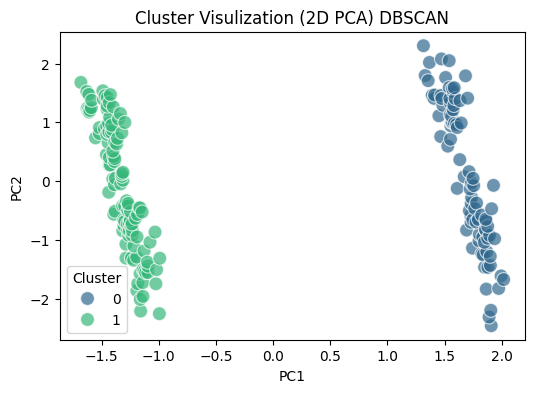

In [41]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='PC1', y='PC2',
    hue = 'Cluster',
    palette = 'viridis',
    data = plot_df,
    s=100, alpha=0.7
)
plt.title("Cluster Visulization (2D PCA) DBSCAN")
plt.show()

In [42]:
print(pd.Series(clusters).value_counts())

1    112
0     88
Name: count, dtype: int64
